# Decision Tree


* 여러분은 OO 통신화사 데이터분석가 입니다.
* 회사는 약정기간이 끝난 고객이 번호이동(이탈)해 가는 문제를 해결하고자 합니다.
* 그래서 여러분에게, 어떤 고객이 번호이동(이탈)해 가는지 예측 모델링을 의뢰하였습니다.

## 1.환경준비

### (1) import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

### (2) 데이터 준비

In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_cust_churn.csv'
data = pd.read_csv(path)
data.head()

,id,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,0,31953,0,6,313378,161,0,4,unsat,little,no,STAY
1,2,1,36147,0,13,800586,244,0,6,unsat,little,considering,STAY
2,3,1,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY
3,4,0,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE
4,5,1,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY


* 변수설명
    * COLLEGE : 대학 졸업여부
    * INCOME : 연수입
    * OVERAGE : 월평균 초과사용 시간(분)
    * LEFTOVER : 월평균 잔여시간비율(%)
    * HOUSE : 집값
    * HANDSET_PRICE : 스마트폰 가격
    * OVER_15MINS_CALLS_PER_MONTH : 월평균 장기통화(15분이상) 횟수
    * AVERAGE_CALL_DURATION : 평균 통화 시간
    * REPORTED_SATISFACTION : 만족도 설문조사 결과
    * REPORTED_USAGE_LEVEL : 사용도 자가진단 결과
    * CONSIDERING_CHANGE_OF_PLAN : 향후 변경계획 설문조사 결과
    * CHURN : 이탈(번호이동) 여부 (Target 변수)


## 2.데이터 전처리

### (1) 변수정리
* 불필요한 변수를 정리합시다.
    * 식별자 : 일련번호, 주민번호, 전화번호, 고객ID, 사번
    * 시계열 데이터 중 : 어떤 기간동안 거의 변화가 없는 값.(변동이 거의 없는) 값.


In [3]:
drop_cols = ['id']
data.drop(drop_cols, axis = 1, inplace = True )

### (2) x,y 분할

In [4]:
target = 'CHURN'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

### (3) 가변수화

가변수화를 수행하시오.

In [5]:
dumm_cols = ['REPORTED_SATISFACTION','REPORTED_USAGE_LEVEL','CONSIDERING_CHANGE_OF_PLAN']
x = pd.get_dummies(x, columns = dumm_cols, drop_first = True)

In [6]:
x.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION_sat,REPORTED_SATISFACTION_unsat,REPORTED_SATISFACTION_very_sat,REPORTED_SATISFACTION_very_unsat,REPORTED_USAGE_LEVEL_high,REPORTED_USAGE_LEVEL_little,REPORTED_USAGE_LEVEL_very_high,REPORTED_USAGE_LEVEL_very_little,CONSIDERING_CHANGE_OF_PLAN_considering,CONSIDERING_CHANGE_OF_PLAN_never_thought,CONSIDERING_CHANGE_OF_PLAN_no,CONSIDERING_CHANGE_OF_PLAN_perhaps
0,0,31953,0,6,313378,161,0,4,False,True,False,False,False,True,False,False,False,False,True,False
1,1,36147,0,13,800586,244,0,6,False,True,False,False,False,True,False,False,True,False,False,False
2,1,27273,230,0,305049,201,16,15,False,True,False,False,False,False,False,True,False,False,False,True
3,0,120070,38,33,788235,780,3,2,False,True,False,False,False,False,True,False,True,False,False,False
4,1,29215,208,85,224784,241,21,1,False,False,False,True,False,True,False,False,False,True,False,False


### (4) train, val 분할

In [7]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

## 3.모델링

### (1) 필요한 함수 불러오기

In [8]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import *

### (2) 선언

In [9]:
model = DecisionTreeClassifier()

### (3) 모델링(학습)

In [10]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

### (4) 검증 : 예측

In [11]:
pred = model.predict(x_val)

### (5) 검증 : 평가

* confusion matrix

In [12]:
confusion_matrix(y_val, pred)

array([[1155,  807],
       [ 739, 1299]])

* classification report

In [13]:
print(classification_report(y_val, pred, digits = 4))

              precision    recall  f1-score   support

       LEAVE     0.6098    0.5887    0.5991      1962
        STAY     0.6168    0.6374    0.6269      2038

    accuracy                         0.6135      4000
   macro avg     0.6133    0.6130    0.6130      4000
weighted avg     0.6134    0.6135    0.6133      4000



## 3.Decision Tree 추가 내용

### (1) 모델 시각화

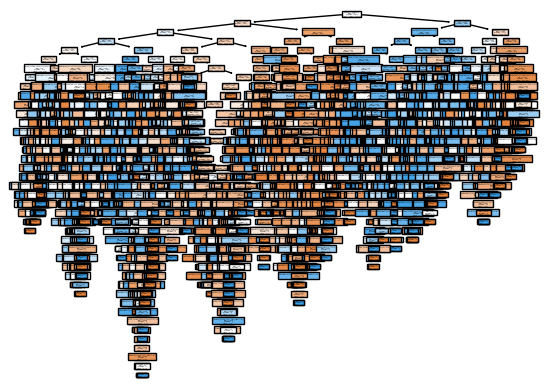

In [14]:
# 시각화
from sklearn.tree import plot_tree

# Decision Tree는 모델을 시각화 할 수 있다.
plot_tree(model,                       # 만든 모델 이름
          feature_names = x_train.columns,    #Feature 이름, list(x_train)
          filled = True);

In [15]:
from sklearn.tree import plot_tree

* 모델을 작게 만들어 봅시다.

[Text(0.5, 0.875, 'HOUSE <= 600636.0\ngini = 0.5\nsamples = 16000\nvalue = [7890.0, 8110.0]'),
 Text(0.25, 0.625, 'OVERAGE <= 106.5\ngini = 0.486\nsamples = 10611\nvalue = [6179, 4432]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'LEFTOVER <= 24.5\ngini = 0.499\nsamples = 7110\nvalue = [3389, 3721]'),
 Text(0.0625, 0.125, 'gini = 0.483\nsamples = 4713\nvalue = [1926, 2787]'),
 Text(0.1875, 0.125, 'gini = 0.476\nsamples = 2397\nvalue = [1463, 934]'),
 Text(0.375, 0.375, 'REPORTED_SATISFACTION_very_sat <= 0.5\ngini = 0.324\nsamples = 3501\nvalue = [2790, 711]'),
 Text(0.3125, 0.125, 'gini = 0.337\nsamples = 2648\nvalue = [2081, 567]'),
 Text(0.4375, 0.125, 'gini = 0.281\nsamples = 853\nvalue = [709, 144]'),
 Text(0.75, 0.625, 'INCOME <= 100357.5\ngini = 0.433\nsamples = 5389\nvalue = [1711, 3678]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'AVERAGE_CALL_DURATION <= 9.5\ngini = 0.304\nsamples = 3627\nvalue = [679, 2948]'),
 Text(0.5625, 0.125, 'gini = 0.292\nsamples = 27

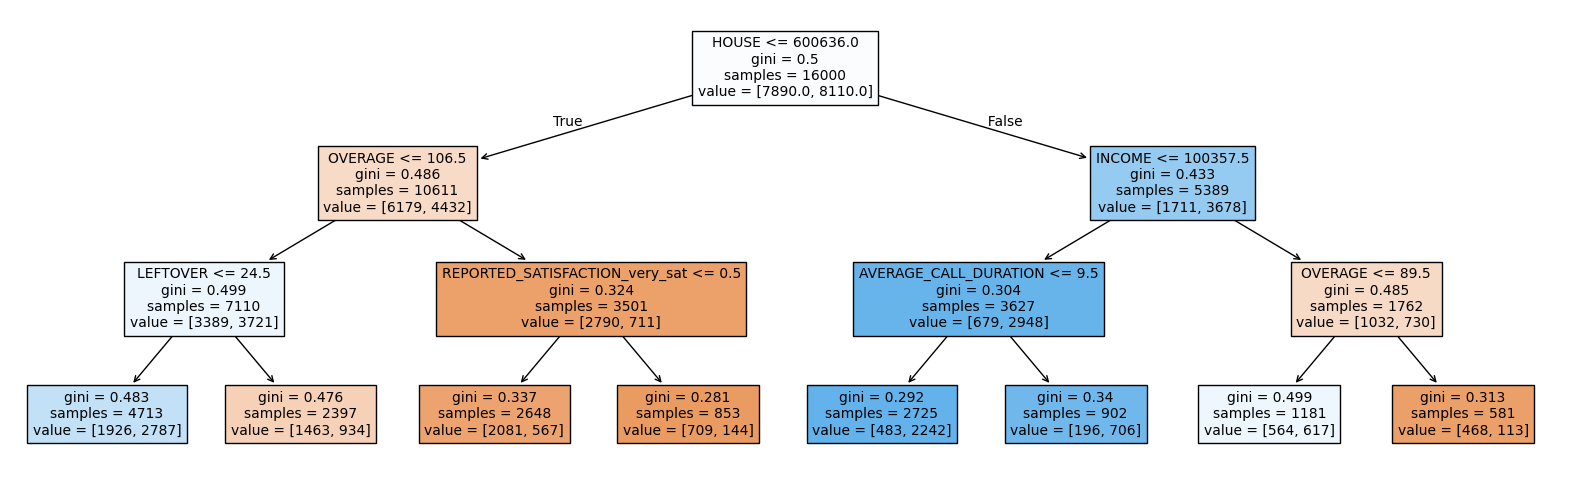

In [16]:
model2 = DecisionTreeClassifier(max_depth = 3)
model2.fit(x_train, y_train)

plt.figure(figsize = (20,6))
plot_tree(model2, feature_names = x_train.columns,
          filled = True, fontsize = 10)

### (1) 지니 불순도 (Gini Impurity) 계산

지니 불순도는 데이터 세트에서 무작위로 선택된 요소가 잘못 분류될 확률을 측정합니다. **불순도가 낮을수록 데이터 세트가 더 순수**(즉, 한 클래스에 속하는 경우가 많음)하다는 것을 의미합니다. 의사결정 트리"는 노드를 분할할 때 지니 불순도를 최소화하는 방향으로 진행됩니다.

**계산식:**
$Gini(D) = 1 - \sum_{i=1}^{c} p_i^2$

여기서 $D$는 데이터 세트, $c$는 클래스의 수, $p_i$는 클래스 $i$에 속하는 요소의 비율입니다.

In [17]:
from collections import Counter
import numpy as np

def calculate_gini_impurity(labels):
    # 레이블이 없으면 불순도는 0
    if not labels:
        return 0

    # 각 클래스의 개수를 센다.
    counts = Counter(labels)

    # 전체 레이블 개수
    total_labels = len(labels)

    gini = 1.0
    for label in counts:
        # 각 클래스의 비율
        probability = counts[label] / total_labels
        # 지니 불순도 계산식에 따라 빼준다.
        gini -= probability**2

    return gini

# max_depth=3 모델의 루트 노드 정보 (WBcNHiSax8bP 셀 출력 참조)
# value=[LEAVE 수, STAY 수]

# 부모 노드 (전체 학습 데이터)
parent_le_count = 7890
parent_st_count = 8110
parent_labels = ['LEAVE'] * parent_le_count + ['STAY'] * parent_st_count

# 루트 노드의 왼쪽 자식 (HOUSE <= 600636.0)
child1_le_count = 6179
child1_st_count = 4432
child1_labels = ['LEAVE'] * child1_le_count + ['STAY'] * child1_st_count

# 루트 노드의 오른쪽 자식 (HOUSE > 600636.0)
child2_le_count = 1711
child2_st_count = 3678
child2_labels = ['LEAVE'] * child2_le_count + ['STAY'] * child2_st_count

print(f"max_depth=3 모델 부모 노드 Gini Impurity: {calculate_gini_impurity(parent_labels):.4f}")
print(f"max_depth=3 모델 왼쪽 자식 노드 Gini Impurity: {calculate_gini_impurity(child1_labels):.4f}")
print(f"max_depth=3 모델 오른쪽 자식 노드 Gini Impurity: {calculate_gini_impurity(child2_labels):.4f}")

max_depth=3 모델 부모 노드 Gini Impurity: 0.4999
max_depth=3 모델 왼쪽 자식 노드 Gini Impurity: 0.4864
max_depth=3 모델 오른쪽 자식 노드 Gini Impurity: 0.4334


### (2) 정보 획득량 (Information Gain) 계산

정보 획득량은 특정 속성으로 데이터를 분할할 때 얻을 수 있는 정보의 양을 측정합니다. 다시 말해, 분할 전의 불순도(또는 엔트로피)에서 분할 후의 가중 평균 불순도(또는 엔트로피)를 뺀 값입니다. **정보 획득량이 클수록 해당 속성이 데이터를 더 잘 분류한다**는 의미이므로, 의사결정 트리는 가장 높은 정보 획득량을 제공하는 속성을 선택하여 분할합니다.

**계산식:**
$IG(D, A) = Gini(D) - \sum_{j=1}^{v} \frac{|D_j|}{|D|} Gini(D_j)$

여기서 $D$는 부모 노드의 데이터 세트, $A$는 분할에 사용된 속성, $v$는 속성 $A$의 고유한 값의 수, $D_j$는 속성 $A$의 $j$번째 값에 해당하는 부분 데이터 세트입니다.

**정보 획득량 (Information Gain) 계산식:**

$IG(D, A) = Gini(D) - \sum_{j=1}^{v} \frac{|D_j|}{|D|} Gini(D_j)$

여기서 각 기호의 의미는 다음과 같습니다:

*   $IG(D, A)$: 데이터 세트 $D$를 속성 $A$로 분할했을 때의 정보 획득량 (Information Gain)
*   $Gini(D)$: 분할 전 부모 노드의 지니 불순도
*   $A$: 데이터를 분할하는 데 사용되는 특정 속성 (Feature)
*   $v$: 속성 $A$가 가질 수 있는 고유한 값의 수
*   $D_j$: 속성 $A$의 $j$번째 값에 해당하는 부분 데이터 세트 (자식 노드)
*   $|D|$: 부모 노드의 전체 데이터 개수
*   $|D_j|$: $j$번째 자식 노드의 데이터 개수
*   $Gini(D_j)$: $j$번째 자식 노드의 지니 불순도

이 식은 '분할 전의 불순도'에서 '분할 후 자식 노드들의 가중 평균 불순도'를 뺀 값으로, 이 값이 클수록 해당 속성으로 분할하는 것이 데이터를 더 효과적으로 분류한다는 것을 의미합니다.

In [18]:
from collections import Counter

# 클래스별 카운트를 사용하여 지니 불순도 계산 함수 수정
def calculate_gini_impurity_from_counts(class_counts):
    total_samples = sum(class_counts.values())
    if total_samples == 0:
        return 0

    gini = 1.0
    for count in class_counts.values():
        probability = count / total_samples
        gini -= probability**2
    return gini

# 클래스별 카운트와 자식 노드 리스트를 사용하여 정보 획득량 계산 함수 수정
def calculate_information_gain_from_counts(parent_class_counts, list_of_child_class_counts):
    parent_gini = calculate_gini_impurity_from_counts(parent_class_counts)
    total_parent_samples = sum(parent_class_counts.values())

    weighted_child_gini = 0.0
    for child_class_counts in list_of_child_class_counts:
        child_samples = sum(child_class_counts.values())
        if child_samples > 0: # 자식 노드에 데이터가 있을 경우에만 계산
            child_gini = calculate_gini_impurity_from_counts(child_class_counts)
            weighted_child_gini += (child_samples / total_parent_samples) * child_gini

    information_gain = parent_gini - weighted_child_gini
    return information_gain


# max_depth=3 모델의 루트 노드 정보 (WBcNHiSax8bP 셀 출력 참조)
# value=[LEAVE 수, STAY 수]
parent_class_counts = {'LEAVE': 7890, 'STAY': 8110} # samples = 16000

# 루트 노드의 왼쪽 자식 (HOUSE <= 600636.0)
child1_class_counts = {'LEAVE': 6179, 'STAY': 4432} # samples = 10611

# 루트 노드의 오른쪽 자식 (HOUSE > 600636.0)
child2_class_counts = {'LEAVE': 1711, 'STAY': 3678} # samples = 5389

list_of_child_class_counts = [child1_class_counts, child2_class_counts]

# 계산 수행
calculated_parent_gini = calculate_gini_impurity_from_counts(parent_class_counts)
calculated_child1_gini = calculate_gini_impurity_from_counts(child1_class_counts)
calculated_child2_gini = calculate_gini_impurity_from_counts(child2_class_counts)
calculated_information_gain = calculate_information_gain_from_counts(parent_class_counts, list_of_child_class_counts)

print(f"계산된 부모 노드 Gini 불순도: {calculated_parent_gini:.4f}")
print(f"계산된 왼쪽 자식 노드 Gini 불순도 (HOUSE <= 600636.0): {calculated_child1_gini:.4f}")
print(f"계산된 오른쪽 자식 노드 Gini 불순도 (HOUSE > 600636.0): {calculated_child2_gini:.4f}")
print(f"계산된 루트 노드 분할의 정보 획득량: {calculated_information_gain:.4f}")

계산된 부모 노드 Gini 불순도: 0.4999
계산된 왼쪽 자식 노드 Gini 불순도 (HOUSE <= 600636.0): 0.4864
계산된 오른쪽 자식 노드 Gini 불순도 (HOUSE > 600636.0): 0.4334
계산된 루트 노드 분할의 정보 획득량: 0.0313


### max_depth = 5 모델 성능 ###
              precision    recall  f1-score   support

       LEAVE     0.6926    0.7074    0.6999      1962
        STAY     0.7124    0.6977    0.7050      2038

    accuracy                         0.7025      4000
   macro avg     0.7025    0.7026    0.7025      4000
weighted avg     0.7027    0.7025    0.7025      4000



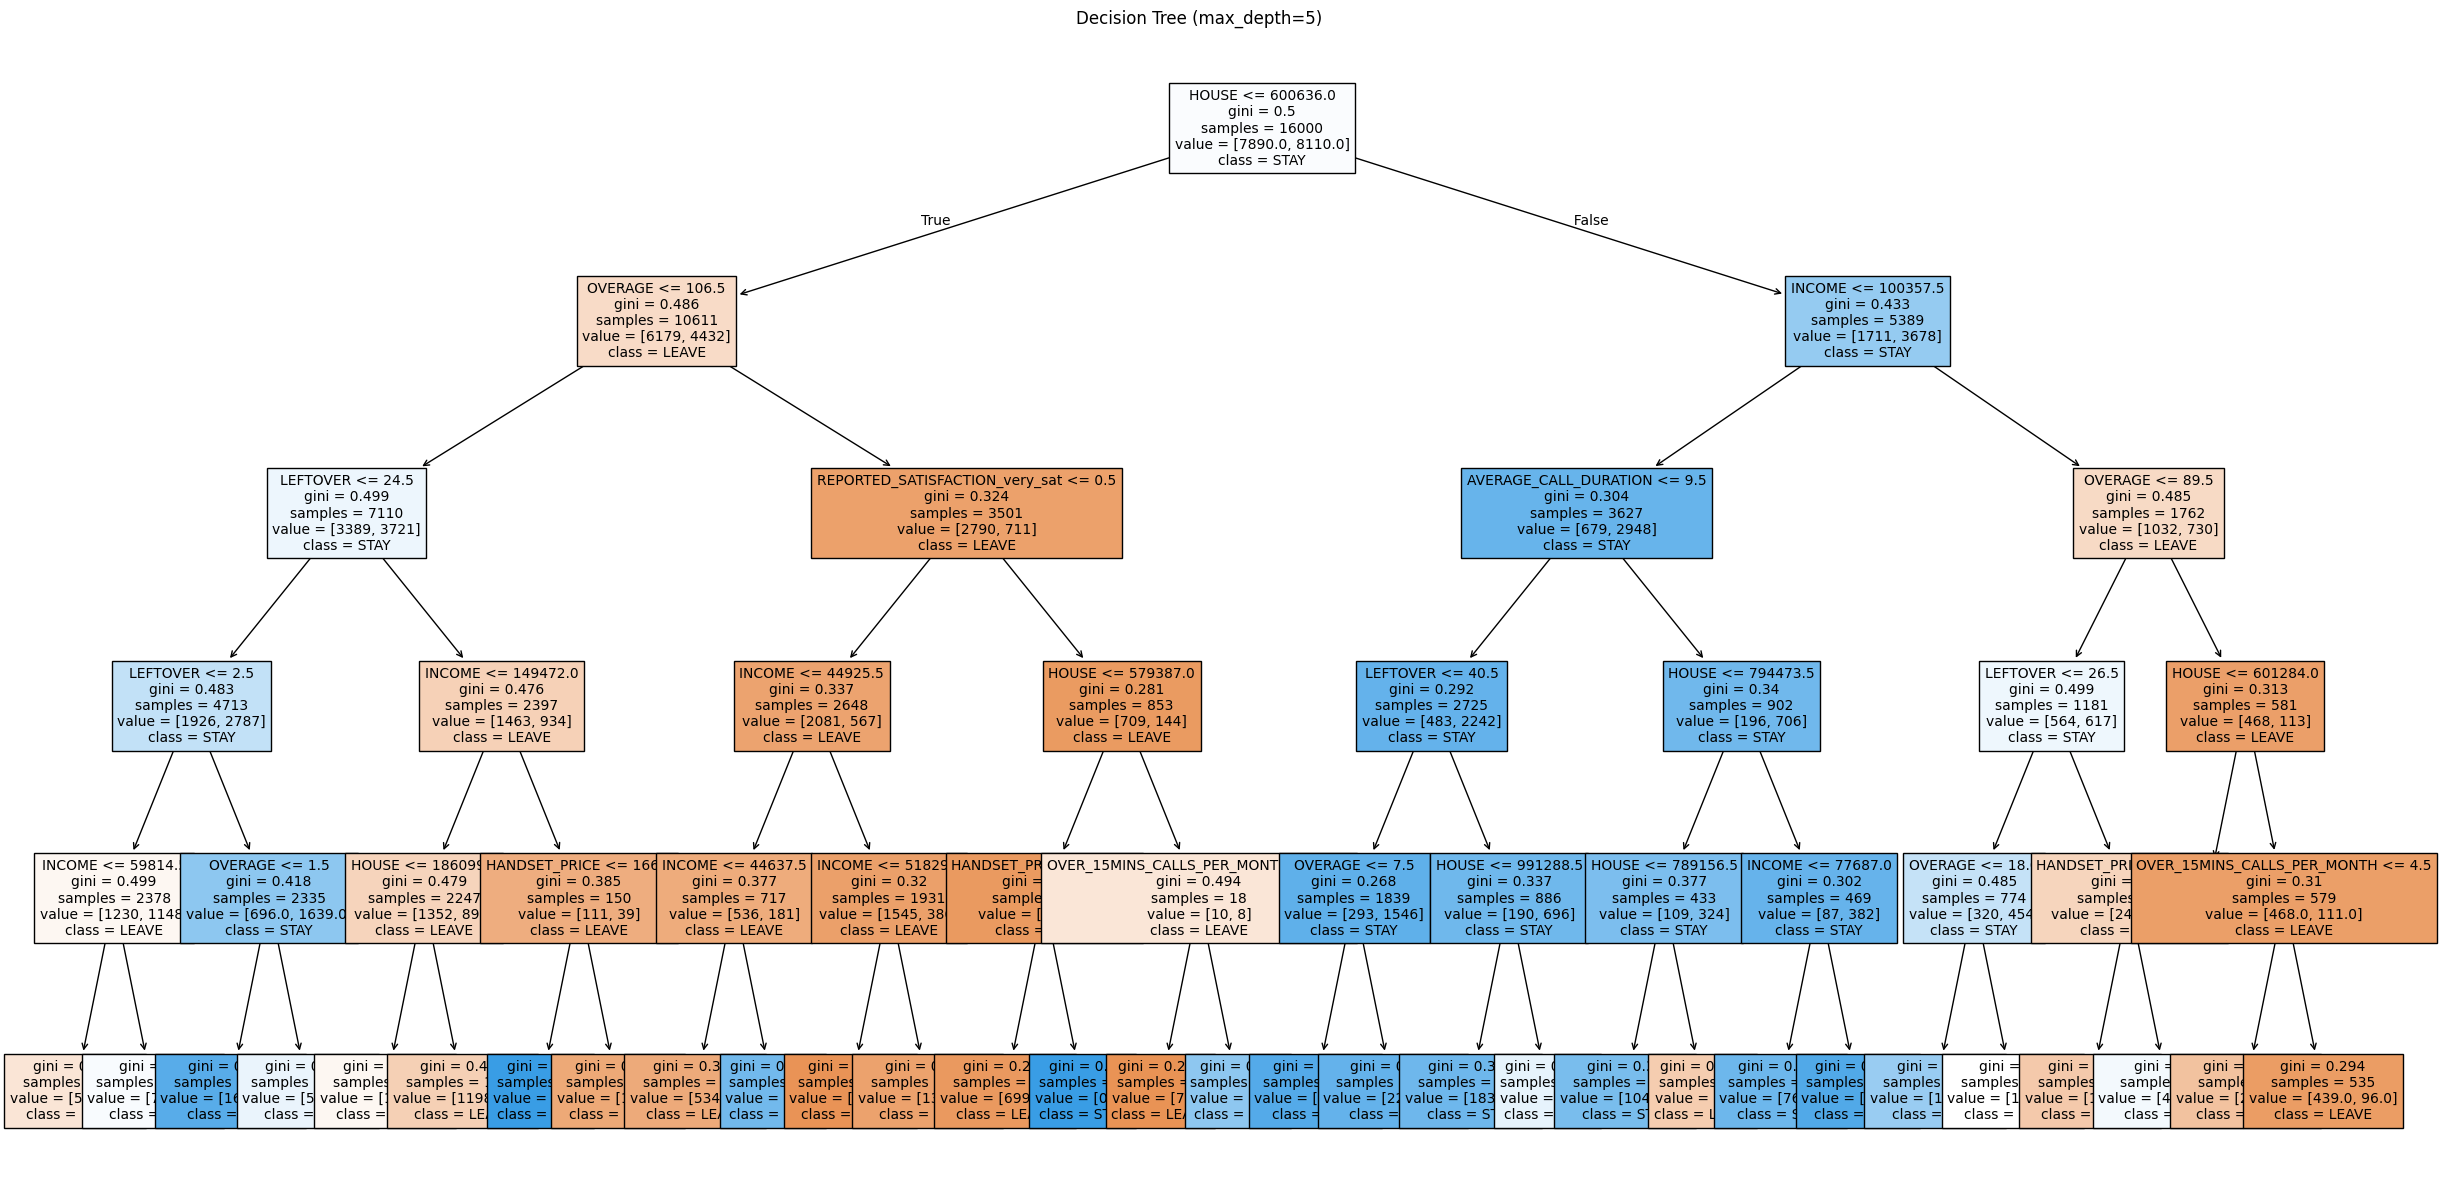

In [19]:
# max_depth = 5 모델 생성 및 학습
model_depth5 = DecisionTreeClassifier(max_depth = 5, random_state = 42)
model_depth5.fit(x_train, y_train)

# 예측 및 평가
pred_depth5 = model_depth5.predict(x_val)
print(f"### max_depth = 5 모델 성능 ###\n{classification_report(y_val, pred_depth5, digits = 4)}")

# 시각화
plt.figure(figsize = (30, 15))
plot_tree(model_depth5, feature_names = x_train.columns, filled = True, fontsize = 10, class_names=['LEAVE', 'STAY'])
plt.title('Decision Tree (max_depth=5)')
plt.show()

In [20]:
def calculate_information_gain(parent_labels, child_labels_list):
    # 부모 노드의 지니 불순도 계산
    parent_gini = calculate_gini_impurity(parent_labels)

    # 자식 노드들의 가중 평균 지니 불순도 계산
    weighted_child_gini = 0.0
    total_parent_size = len(parent_labels)

    for child_labels in child_labels_list:
        if child_labels: # 자식 노드에 데이터가 있을 경우에만 계산
            child_size = len(child_labels)
            child_gini = calculate_gini_impurity(child_labels)
            weighted_child_gini += (child_size / total_parent_size) * child_gini

    # 정보 획득량 = 부모 지니 - 자식들의 가중 평균 지니
    information_gain = parent_gini - weighted_child_gini

    return information_gain

# 예시 사용법:
# 전체 데이터 (부모 노드)
parent_data = ['STAY', 'STAY', 'LEAVE', 'STAY', 'LEAVE', 'LEAVE', 'STAY', 'LEAVE']

# 어떤 속성으로 분할했을 때의 자식 노드들
# 예를 들어, 'COLLEGE' 여부로 분할했다고 가정
child1_data = ['STAY', 'LEAVE', 'LEAVE', 'LEAVE'] # COLLEGE = 0 인 경우
child2_data = ['STAY', 'STAY', 'STAY', 'LEAVE']    # COLLEGE = 1 인 경우

# 자식 노드 리스트
child_nodes_data = [child1_data, child2_data]

# 정보 획득량 계산
ig = calculate_information_gain(parent_data, child_nodes_data)
print(f"Information Gain for this split: {ig:.4f}")

# 또 다른 예시: 더 나은 분할
parent_data_2 = ['STAY', 'STAY', 'LEAVE', 'STAY', 'LEAVE', 'LEAVE', 'STAY', 'LEAVE']
child1_data_2 = ['STAY', 'STAY', 'STAY'] # 예를 들어, 'OVERAGE'가 낮은 그룹
child2_data_2 = ['LEAVE', 'LEAVE', 'LEAVE', 'STAY', 'LEAVE'] # 'OVERAGE'가 높은 그룹
child_nodes_data_2 = [child1_data_2, child2_data_2]
ig_2 = calculate_information_gain(parent_data_2, child_nodes_data_2)
print(f"Information Gain for a better split: {ig_2:.4f}")

Information Gain for this split: 0.1250
Information Gain for a better split: 0.3000


### (2) 변수 중요도

In [21]:
# 변수 중요도
print(x_train.columns)
print(model.feature_importances_)

Index(['COLLEGE', 'INCOME', 'OVERAGE', 'LEFTOVER', 'HOUSE', 'HANDSET_PRICE',
       'OVER_15MINS_CALLS_PER_MONTH', 'AVERAGE_CALL_DURATION',
       'REPORTED_SATISFACTION_sat', 'REPORTED_SATISFACTION_unsat',
       'REPORTED_SATISFACTION_very_sat', 'REPORTED_SATISFACTION_very_unsat',
       'REPORTED_USAGE_LEVEL_high', 'REPORTED_USAGE_LEVEL_little',
       'REPORTED_USAGE_LEVEL_very_high', 'REPORTED_USAGE_LEVEL_very_little',
       'CONSIDERING_CHANGE_OF_PLAN_considering',
       'CONSIDERING_CHANGE_OF_PLAN_never_thought',
       'CONSIDERING_CHANGE_OF_PLAN_no', 'CONSIDERING_CHANGE_OF_PLAN_perhaps'],
      dtype='object')
[0.02300702 0.18250816 0.15804092 0.09595541 0.20910777 0.10882306
 0.0501674  0.04733433 0.00495714 0.01003013 0.01205559 0.00909513
 0.00659147 0.01245589 0.01193596 0.0150501  0.01576585 0.00788392
 0.01195635 0.00727841]


* 변수중요도 그래프 그리기 함수 만들기

In [22]:
def plot_feature_importance(importance, names):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df.reset_index(drop=True, inplace = True)

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.grid()

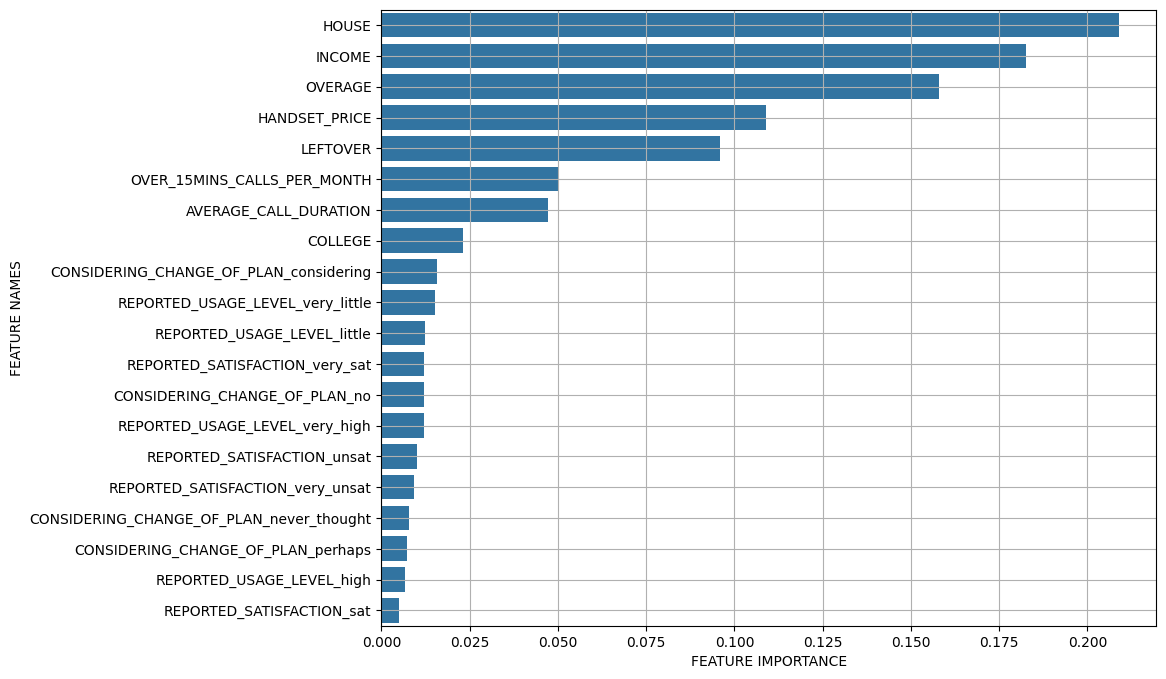

In [23]:
plot_feature_importance(model.feature_importances_, list(x_train))

:### (3) 실습 Hyper Parameter 다루기
* 다음의 조건으로 모델 생성, 시각화, 성능 비교를 수행해 봅시다.
    * max_depth : 1,2,3,4,5


### max_depth = 1 모델 성능 ###
              precision    recall  f1-score   support

       LEAVE     0.5816    0.7773    0.6654      1962
        STAY     0.6829    0.4617    0.5509      2038

    accuracy                         0.6165      4000
   macro avg     0.6322    0.6195    0.6081      4000
weighted avg     0.6332    0.6165    0.6071      4000



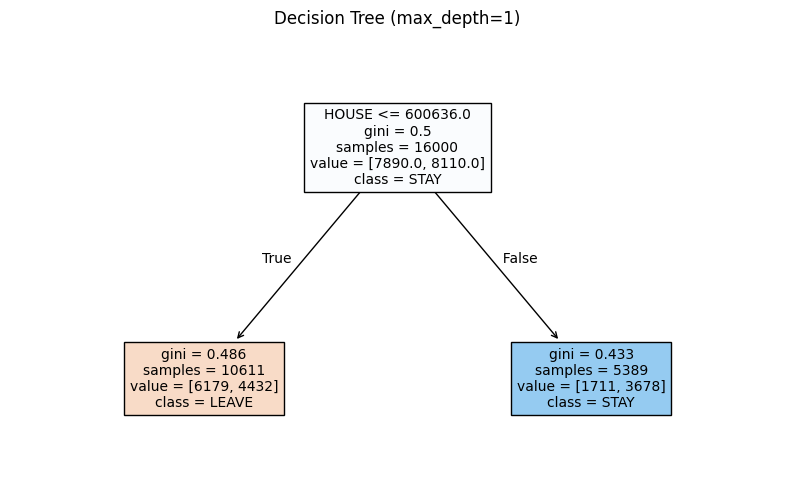

In [24]:
# max_depth = 1 모델 생성 및 학습
model_depth1 = DecisionTreeClassifier(max_depth = 1, random_state = 42)
model_depth1.fit(x_train, y_train)

# 예측 및 평가
pred_depth1 = model_depth1.predict(x_val)
print(f"### max_depth = 1 모델 성능 ###\n{classification_report(y_val, pred_depth1, digits = 4)}")

# 시각화
plt.figure(figsize = (10, 6))
plot_tree(model_depth1, feature_names = x_train.columns, filled = True, fontsize = 10, class_names=['LEAVE', 'STAY'])
plt.title('Decision Tree (max_depth=1)')
plt.show()

### max_depth = 2 모델 성능 ###
              precision    recall  f1-score   support

       LEAVE     0.7062    0.4888    0.5777      1962
        STAY     0.6204    0.8042    0.7004      2038

    accuracy                         0.6495      4000
   macro avg     0.6633    0.6465    0.6391      4000
weighted avg     0.6625    0.6495    0.6402      4000



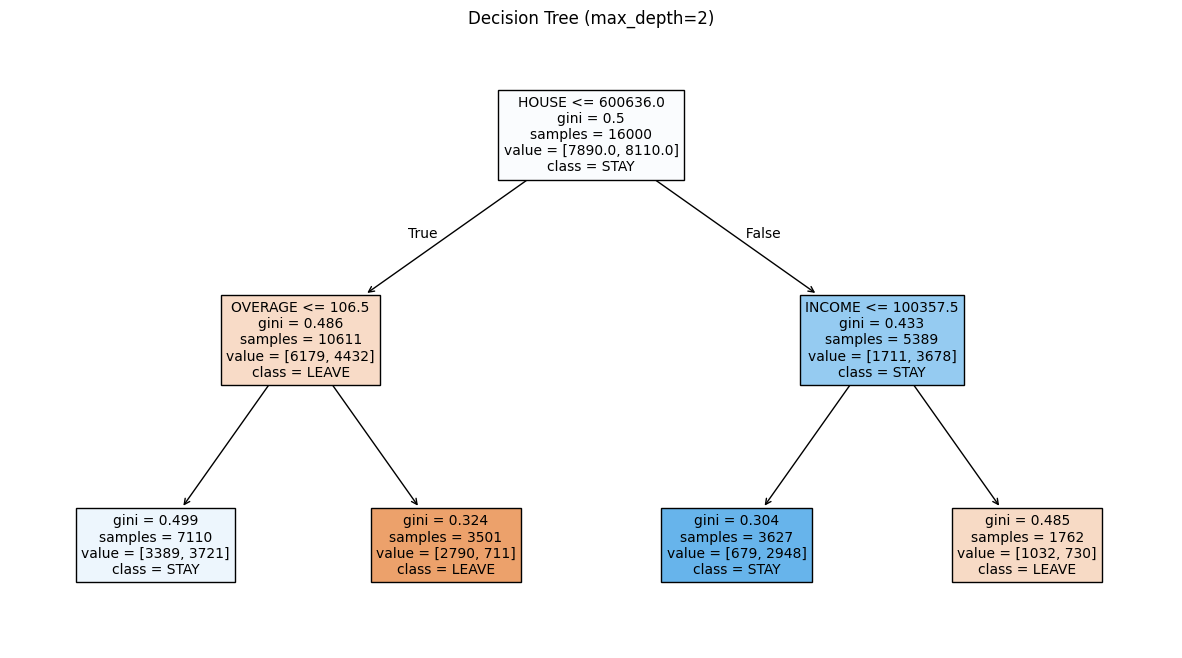

In [25]:
# max_depth = 2 모델 생성 및 학습
model_depth2 = DecisionTreeClassifier(max_depth = 2, random_state = 42)
model_depth2.fit(x_train, y_train)

# 예측 및 평가
pred_depth2 = model_depth2.predict(x_val)
print(f"### max_depth = 2 모델 성능 ###\n{classification_report(y_val, pred_depth2, digits = 4)}")

# 시각화
plt.figure(figsize = (15, 8))
plot_tree(model_depth2, feature_names = x_train.columns, filled = True, fontsize = 10, class_names=['LEAVE', 'STAY'])
plt.title('Decision Tree (max_depth=2)')
plt.show()

### max_depth = 3 모델 성능 ###
              precision    recall  f1-score   support

       LEAVE     0.7242    0.5928    0.6519      1962
        STAY     0.6662    0.7826    0.7198      2038

    accuracy                         0.6895      4000
   macro avg     0.6952    0.6877    0.6858      4000
weighted avg     0.6947    0.6895    0.6865      4000



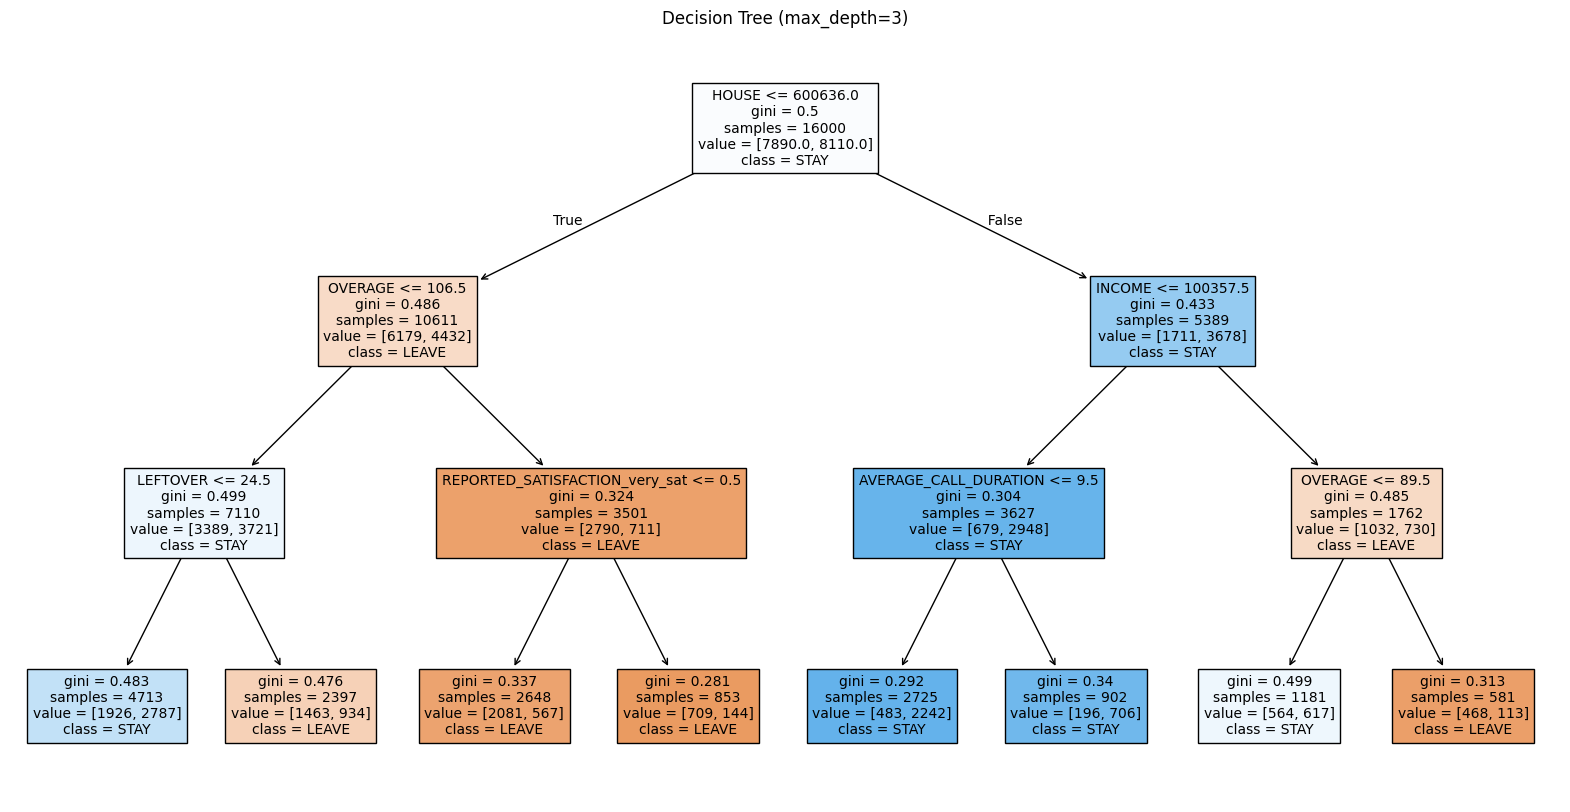

In [26]:
# max_depth = 3 모델 생성 및 학습
model_depth3 = DecisionTreeClassifier(max_depth = 3, random_state = 42)
model_depth3.fit(x_train, y_train)

# 예측 및 평가
pred_depth3 = model_depth3.predict(x_val)
print(f"### max_depth = 3 모델 성능 ###\n{classification_report(y_val, pred_depth3, digits = 4)}")

# 시각화
plt.figure(figsize = (20, 10))
plot_tree(model_depth3, feature_names = x_train.columns, filled = True, fontsize = 10, class_names=['LEAVE', 'STAY'])
plt.title('Decision Tree (max_depth=3)')
plt.show()

### max_depth = 4 모델 성능 ###
              precision    recall  f1-score   support

       LEAVE     0.6760    0.7773    0.7231      1962
        STAY     0.7494    0.6413    0.6912      2038

    accuracy                         0.7080      4000
   macro avg     0.7127    0.7093    0.7071      4000
weighted avg     0.7134    0.7080    0.7068      4000



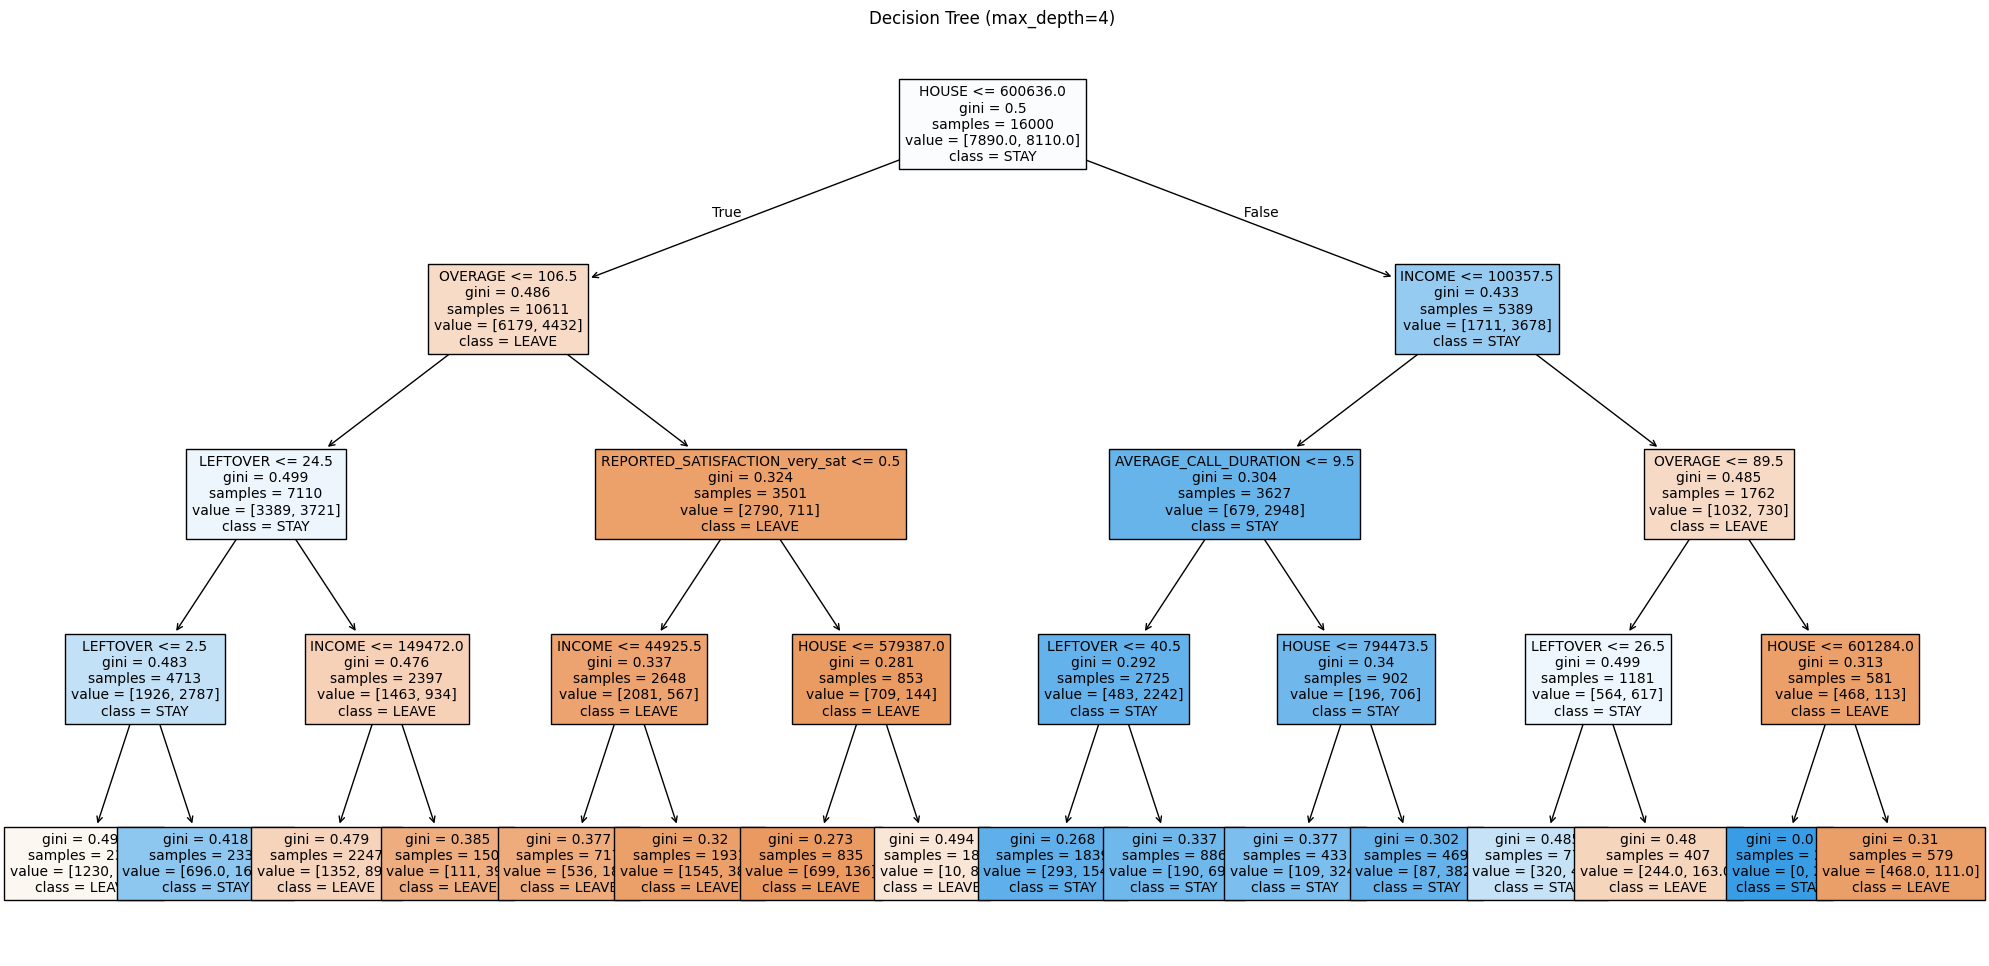

In [27]:
# max_depth = 4 모델 생성 및 학습
model_depth4 = DecisionTreeClassifier(max_depth = 4, random_state = 42)
model_depth4.fit(x_train, y_train)

# 예측 및 평가
pred_depth4 = model_depth4.predict(x_val)
print(f"### max_depth = 4 모델 성능 ###\n{classification_report(y_val, pred_depth4, digits = 4)}")

# 시각화
plt.figure(figsize = (25, 12))
plot_tree(model_depth4, feature_names = x_train.columns, filled = True, fontsize = 10, class_names=['LEAVE', 'STAY'])
plt.title('Decision Tree (max_depth=4)')
plt.show()